# Thesis: Alphafold3 Prediction Analysis
---

In [19]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Read in data
df = pd.read_csv('../data/af3_data.csv')

# Create SMILES dataframe with SMILES columns
smiles_cols = [col for col in df.columns if 'SMILES' in col]
smiles_df = df[['PDB_ID'] + smiles_cols]

# Create CCD dataframe with CCD columns 
ccd_cols = [col for col in df.columns if 'CCD' in col]
ccd_df = df[['PDB_ID'] + ccd_cols]

,PDB_ID,PDB_LINK,PDB_RELEASE_DATE,PBD_RESOLUTION (Å),PDB_R-VALUE FREE,PDB_R-VALUE WORK,PDB_R-VALUE OBSERVED,SMILES RMSD,SMILES DOCKQ SCORE,SMILES DOCKQ iRMSD,...,SMILES RANKING_SCORE,CCD RMSD,CCD DOCKQ SCORE,CCD DOCKQ iRMSD,CCD DOCKQ LRMSD,CCD FRACTION DISORDERED,CCD HAS_CLASH,CCD IPTM,CCD PTM,CCD RANKING_SCORE
0,5HXB,5HXB,2016-06-29,3.600,0.2730,0.2240,0.2260,0.683,0.874,0.785,...,0.87,0.674,0.867,0.783,1.286,0.03,0,0.87,0.84,0.88
1,5T35,5T35,2017-03-08,2.700,0.2307,0.2055,0.2067,2.35,0.578,1.736,...,0.81,2.000,0.629,1.471,4.559,0.09,0,0.72,0.79,0.78
2,6BN7,6BN7,2018-05-30,3.501,0.2555,0.2123,0.2143,0.601,0.226,4.539,...,0.88,0.716,0.674,1.134,3.446,0.06,0,0.85,86.00,0.88
3,6BOY,6BOY,2018-05-30,3.330,0.2344,0.1994,0.2014,0.765,0.092,6.875,...,0.69,0.643,0.426,2.259,7.594,0.12,0,0.64,0.70,0.72
4,6HM0,6HM0,2019-01-16,2.400,0.2507,0.2158,0.2177,0.317,NaN,NaN,...,0.92,0.397,NaN,NaN,NaN,0.08,0,0.88,0.88,0.92


In [6]:
smiles_df.head()


,PDB_ID,SMILES RMSD,SMILES DOCKQ SCORE,SMILES DOCKQ iRMSD,SMILES DOCKQ LRMSD,SMILES FRACTION DISORDERED,SMILES HAS_CLASH,SMILES IPTM,SMILES PTM,SMILES RANKING_SCORE
0,5HXB,0.683,0.874,0.785,1.411,0.03,0.0,0.86,0.84,0.87
1,5T35,2.35,0.578,1.736,5.485,0.10,0.0,0.75,0.82,0.81
2,6BN7,0.601,0.226,4.539,12.923,0.06,0.0,0.85,0.85,0.88
3,6BOY,0.765,0.092,6.875,18.065,0.16,0.0,0.60,0.66,0.69
4,6HM0,0.317,NaN,NaN,NaN,0.09,0.0,0.87,0.88,0.92


In [7]:
ccd_df.head()

,PDB_ID,CCD RMSD,CCD DOCKQ SCORE,CCD DOCKQ iRMSD,CCD DOCKQ LRMSD,CCD FRACTION DISORDERED,CCD HAS_CLASH,CCD IPTM,CCD PTM,CCD RANKING_SCORE
0,5HXB,0.674,0.867,0.783,1.286,0.03,0,0.87,0.84,0.88
1,5T35,2.000,0.629,1.471,4.559,0.09,0,0.72,0.79,0.78
2,6BN7,0.716,0.674,1.134,3.446,0.06,0,0.85,86.00,0.88
3,6BOY,0.643,0.426,2.259,7.594,0.12,0,0.64,0.70,0.72
4,6HM0,0.397,NaN,NaN,NaN,0.08,0,0.88,0.88,0.92


Plot PBDID vs DockQ Scores
---


In [33]:
smiles_dockq_df = df[['PDB_ID', 'SMILES DOCKQ SCORE']]
ccd_dockq_df = df[['PDB_ID', 'CCD DOCKQ SCORE']]

# Drop rows with missing DockQ scores from both dataframes
smiles_dockq_df = smiles_dockq_df.dropna(subset=['SMILES DOCKQ SCORE'])
ccd_dockq_df = ccd_dockq_df.dropna(subset=['CCD DOCKQ SCORE'])

smiles_dockq_df.head()

,PDB_ID,SMILES DOCKQ SCORE
0,5HXB,0.874
1,5T35,0.578
2,6BN7,0.226
3,6BOY,0.092
5,6HAY,0.352


In [34]:
def plot_dockq_scores(df, score_type, title="DockQ Scores by PDB ID"):
    """
    Plot DockQ scores for each PDB ID using a bar plot.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing PDB_ID and DockQ score columns
    score_type : str
        Type of DockQ score ('SMILES DockQ Score' or 'CCD DockQ Score')
    title : str, optional
        Title for the plot (default: "DockQ Scores by PDB ID")
    """
    # Map display names to column names
    column_mapping = {
        'SMILES DockQ Score': 'SMILES DOCKQ SCORE',
        'CCD DockQ Score': 'CCD DOCKQ SCORE'
    }

    column_name = column_mapping[score_type]

    # Create plot
    plt.style.use('default')
    plt.figure(figsize=(15, 8))
    sns.barplot(data=df, x='PDB_ID', y=column_name)
    plt.axhline(y=0.23, color='red', linestyle='-', label='Acceptable Threshold (0.23)')
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('PDB ID', fontsize=12)
    plt.ylabel(score_type, fontsize=12)
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

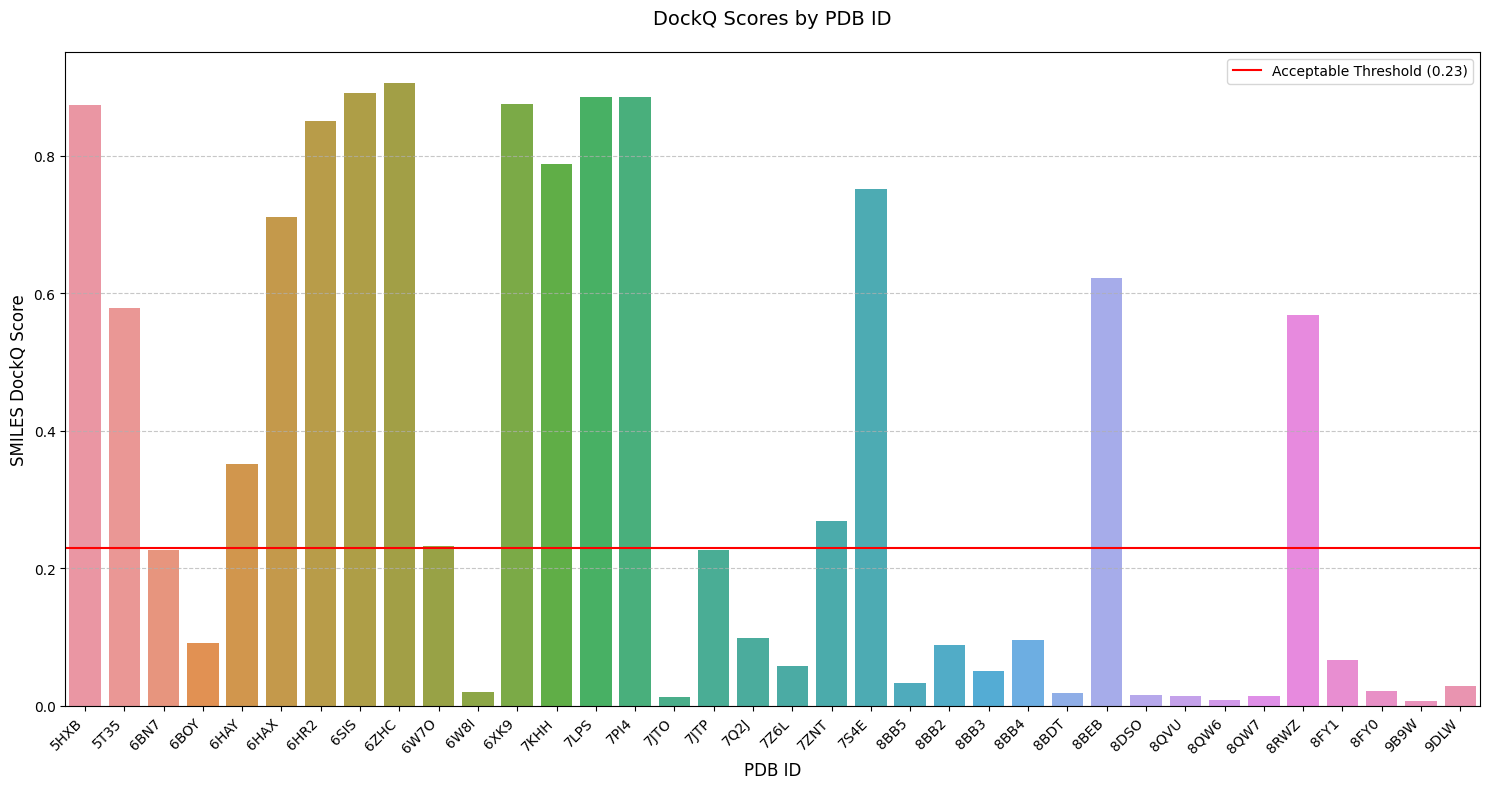

In [35]:
plot_dockq_scores(smiles_dockq_df, 'SMILES DockQ Score')

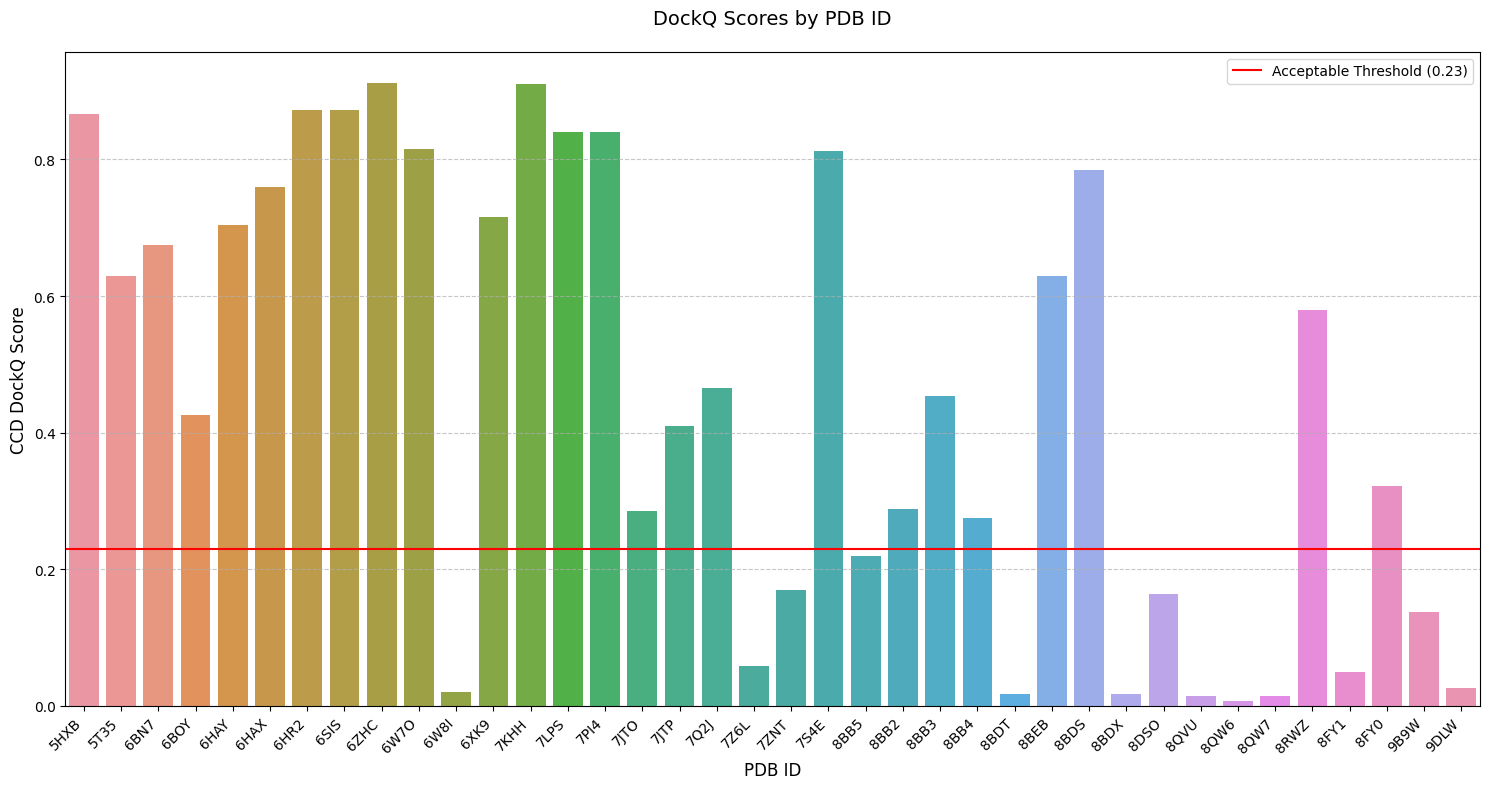

In [36]:
plot_dockq_scores(ccd_dockq_df, 'CCD DockQ Score')